# Vision Transformer Tensorflow/Keras implementation

This Colab notebook allows you to run Keras implementation of the Vision Transformer.

See the official paper at https://arxiv.org/abs/2010.11929


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Lukasz-sj/vit_keras/blob/master/colab/vit_keras.ipynb)

## Setup

Download the source code from Github, install tensorflow-addons.

In [1]:
!pip install -U tensorflow-addons
!git clone https://github.com/Lukasz-sj/vit_keras

     |████████████████████████████████| 706kB 5.8MB/s 
  Found existing installation: tensorflow-addons 0.8.3
    Uninstalling tensorflow-addons-0.8.3:
      Successfully uninstalled tensorflow-addons-0.8.3
Cloning into 'vit_keras'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 82 (delta 39), reused 62 (delta 22), pack-reused 0
Unpacking objects: 100% (82/82), done.


Download the official implementation pretrained weights and labels of ImageNet dataset.

In [2]:
!gsutil cp gs://vit_models/imagenet21k+imagenet2012/ViT-B_16.npz ViT-B_16_imagenet2012.npz
!wget https://storage.googleapis.com/bit_models/ilsvrc2012_wordnet_lemmas.txt
imagenet_labels = dict(enumerate(open('ilsvrc2012_wordnet_lemmas.txt')))

Copying gs://vit_models/imagenet21k+imagenet2012/ViT-B_16.npz...
| [1 files][331.4 MiB/331.4 MiB]                                                
Operation completed over 1 objects/331.4 MiB.                                    
--2020-12-29 11:12:24--  https://storage.googleapis.com/bit_models/ilsvrc2012_wordnet_lemmas.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.214.128, 173.194.215.128, 173.194.216.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21675 (21K) [text/plain]
Saving to: ‘ilsvrc2012_wordnet_lemmas.txt’

ilsvrc2012_wordnet_ 100%[===================>]  21.17K  --.-KB/s    in 0s      

2020-12-29 11:12:25 (95.3 MB/s) - ‘ilsvrc2012_wordnet_lemmas.txt’ saved [21675/21675]



## Create the model

VitBuilder is a class which creates the Keras model of the Vision Transformer. The default size of an image is (384, 384), the number of output classes is 1000. 
The builder will load the pre-trained weights from the 'ViT-B_16_imagenet2012.npz' file.

In [3]:
from vit_keras.builders import VitBuilder

model = VitBuilder().build()

/usr/local/lib/python3.6/dist-packages/tensorflow_addons/activations/gelu.py:81: UserWarning: Default value of `approximate` is changed from `True` to `False`
  "Default value of `approximate` is changed from `True` to `False`"


## Testing the model

 Get a random picture with the default dimensions, predict the image using the created model and show the first five predicted labels.

--2020-12-29 11:21:03--  https://picsum.photos/384
Resolving picsum.photos (picsum.photos)... 104.26.4.30, 104.26.5.30, 172.67.74.163, ...
Connecting to picsum.photos (picsum.photos)|104.26.4.30|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://i.picsum.photos/id/71/384/384.jpg?hmac=UpyqG8gszWiG8v39woL0axfTcnAw4Fne9hbAnM0UipU [following]
--2020-12-29 11:21:03--  https://i.picsum.photos/id/71/384/384.jpg?hmac=UpyqG8gszWiG8v39woL0axfTcnAw4Fne9hbAnM0UipU
Resolving i.picsum.photos (i.picsum.photos)... 104.26.4.30, 104.26.5.30, 172.67.74.163, ...
Connecting to i.picsum.photos (i.picsum.photos)|104.26.4.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘picsum.jpg’

picsum.jpg              [ <=>                ]  33.28K  --.-KB/s    in 0.09s   

2020-12-29 11:21:04 (383 KB/s) - ‘picsum.jpg’ saved [34081]



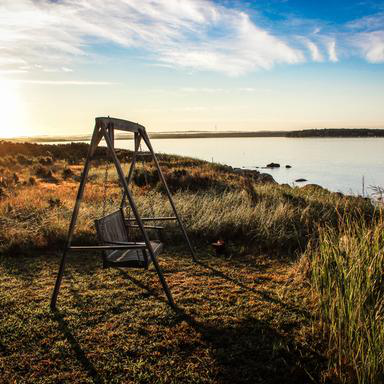

In [25]:
import numpy as np

!wget https://picsum.photos/384 -O picsum.jpg
import PIL
img_origin = PIL.Image.open('picsum.jpg')

img_origin

In [29]:
import tensorflow as tf

img = np.reshape(img_origin, (1, 384, 384, 3))
predicted_result = model.predict( img / 128 - 1)

predicted_result = tf.nn.softmax(predicted_result).numpy()
predicted_result_sorted = predicted_result.argsort()

predicted_result_sorted = predicted_result_sorted[0][:-5:-1]

for idx in predicted_result_sorted:        
  print(f'{predicted_result[0][idx]:.3f} - {imagenet_labels[idx]}')  

0.900 - swing

0.033 - lakeside, lakeshore

0.015 - park_bench

0.007 - rocking_chair, rocker

